In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

Двовимірний датасет

In [2]:
df_2d = pd.read_csv("data_2d.csv", header=None)
display(df_2d)

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


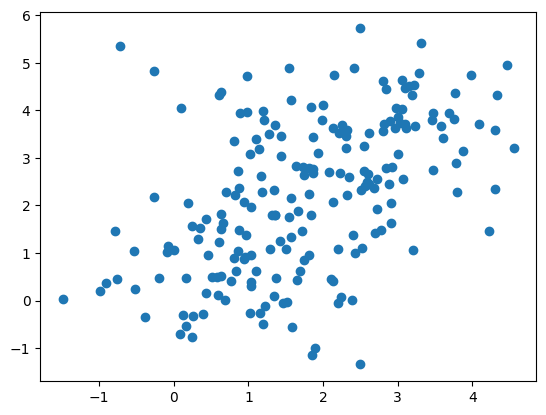

In [3]:
X = df_2d.iloc[:, [1, 2]].values
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Text(0.5, 0, 'Number of clusters')

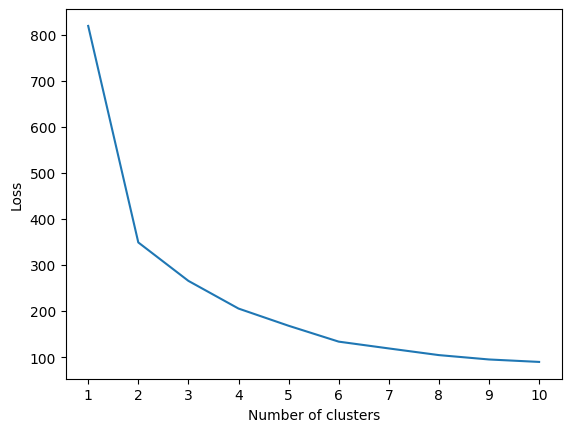

In [4]:
wcss = list()
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init="auto", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xticks(np.arange(1, 11, step=1))
plt.ylabel("Loss")
plt.xlabel("Number of clusters")

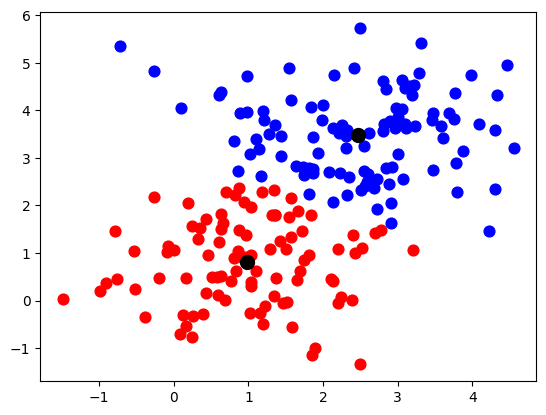

In [5]:
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=60, c="red", label="Cluster1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=60, c="blue", label="Cluster2")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=100,
    c="black",
    label="Centroids",
)

plt.show()

In [6]:
print(classification_report(df_2d.iloc[:, 0].values, y_kmeans))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89       100
         1.0       0.88      0.92      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



Датасет mnist

In [7]:
df_mnist = pd.read_csv("mnist.csv", header=None)
df_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = df_mnist.iloc[:, 1:]
X.shape

(500, 784)

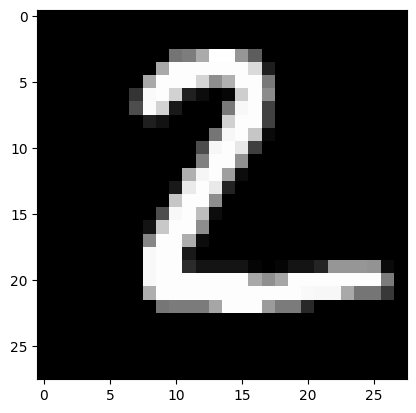

In [9]:
img = X.iloc[1].values 
plt.imshow(
    np.reshape(img, (28, 28)), cmap=plt.cm.gray, interpolation="nearest", clim=(0, 255)
)

In [10]:
pca = PCA(0.18)
lower_X = pca.fit_transform(X)
approximation = pca.inverse_transform(lower_X)
pca.n_components_

2

Text(0.5, 1.0, '18% of Explained Variance')

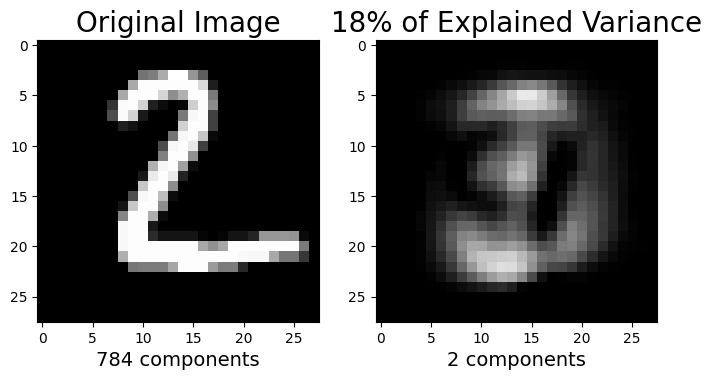

In [11]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(
    X.iloc[1].to_numpy().reshape(28, 28),
    cmap=plt.cm.gray,
    interpolation="nearest",
    clim=(0, 255),
)
plt.xlabel("784 components", fontsize=14)
plt.title("Original Image", fontsize=20)

plt.subplot(1, 2, 2)
plt.imshow(
    approximation[1].reshape(28, 28),
    cmap=plt.cm.gray,
    interpolation="nearest",
    clim=(0, 255),
)
plt.xlabel("2 components", fontsize=14)
plt.title("18% of Explained Variance", fontsize=20)

Text(0.5, 0, 'Number of clusters')

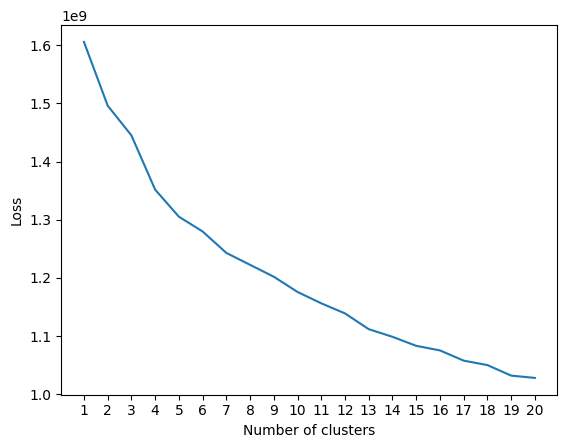

In [12]:
wcss = list()
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init="auto", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss)
plt.xticks(np.arange(1, 21, step=1))
plt.ylabel("Loss")
plt.xlabel("Number of clusters")

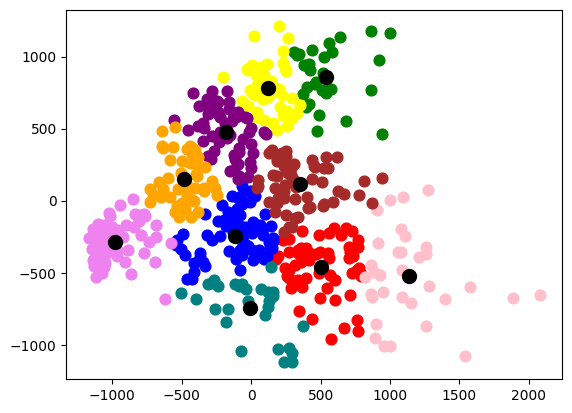

In [13]:
kmeans = KMeans(n_clusters=10, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(lower_X)

plt.scatter(lower_X[y_kmeans == 0, 0], lower_X[y_kmeans == 0, 1], s=60, c="red", label="Cluster1")
plt.scatter(lower_X[y_kmeans == 1, 0], lower_X[y_kmeans == 1, 1], s=60, c="blue", label="Cluster2")
plt.scatter(lower_X[y_kmeans == 2, 0], lower_X[y_kmeans == 2, 1], s=60, c="green", label="Cluster3")
plt.scatter(lower_X[y_kmeans == 3, 0], lower_X[y_kmeans == 3, 1], s=60, c="violet", label="Cluster4")
plt.scatter(lower_X[y_kmeans == 4, 0], lower_X[y_kmeans == 4, 1], s=60, c="yellow", label="Cluster5")
plt.scatter(lower_X[y_kmeans == 5, 0], lower_X[y_kmeans == 5, 1], s=60, c="purple", label="Cluster6")
plt.scatter(lower_X[y_kmeans == 6, 0], lower_X[y_kmeans == 6, 1], s=60, c="pink", label="Cluster7")
plt.scatter(lower_X[y_kmeans == 7, 0], lower_X[y_kmeans == 7, 1], s=60, c="orange", label="Cluster8")
plt.scatter(lower_X[y_kmeans == 8, 0], lower_X[y_kmeans == 8, 1], s=60, c="brown", label="Cluster9")
plt.scatter(lower_X[y_kmeans == 9, 0], lower_X[y_kmeans == 9, 1], s=60, c="teal", label="Cluster10")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=100,
    c="black",
    label="Centroids",
)

plt.show()

In [14]:
print(classification_report(df_mnist.iloc[:, 0].values, y_kmeans))

              precision    recall  f1-score   support

           0       0.27      0.38      0.31        42
           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00        55
           3       0.01      0.02      0.02        45
           4       0.34      0.29      0.31        55
           5       0.04      0.04      0.04        50
           6       0.09      0.07      0.08        43
           7       0.25      0.24      0.25        49
           8       0.28      0.40      0.33        40
           9       0.00      0.00      0.00        54

    accuracy                           0.13       500
   macro avg       0.13      0.14      0.13       500
weighted avg       0.12      0.13      0.12       500

